#### Title: Protein Function Predictions workflow
#### Author: Gerard Duncan
#### Purpose: This is a machine learning script to predict protein function.
#### Data Source: https://ftp.ebi.ac.uk/pub/databases/GO/goa/HUMAN/
#### 
#### Last modified: March 26, 2024
##############################################################


In [52]:
!pip install goatools

In [ ]:
# install tensorboard
!pip install tensorboard

In [272]:
# imports
import numpy as np
import tensorflow as tf
import datetime
import tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split


In [273]:
# Load the data CSV file as a dataframe
df = pd.read_csv('data/seqSet.csv',header=None)
df.columns = ['Protein', 'Sequence']

# Load the metadata CSV file as a dataframe
meta_df = pd.read_csv('data/humanProteinGO.csv',index_col='GO_Annatiation')


This code is designed to process and prepare protein sequence data and their associated pathways for machine learning tasks. It begins by importing necessary libraries, then loads two CSV files - one containing protein sequences ('seqSet.csv') and the other containing metadata for human proteins and their Gene Ontology (GO) annotations ('humanProteinGO.csv'). The data is split into training and testing sets, with 5% of the data being reserved for testing. 


In [274]:
meta_df.head()

,GO:0001933,GO:0003151,GO:0007187,GO:0007611,GO:0008015,GO:0008277,GO:0009408,GO:0030218,GO:0030855,GO:0031018,...,GO:0005887,GO:0005739,GO:0005730,GO:0005576,GO:0005829,GO:0005886,GO:0016021,GO:0005634,GO:0005737,GO:0016020
GO_Annatiation,,,,,,,,,,,,,,,,,,,,,
Q8TBF5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
Q8TBF4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Q5MIZ7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
P30613,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Q5H9L4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [275]:
df

,Protein,Sequence
0,Q8TBF5,MAARVAAVRAAAWLLLGAATGLTRGPAAAFTAARSDAGIRAMCSEI...
1,Q8TBF4,MSGGLAPSKSTVYVSNLPFSLTNNDLYRIFSKYGKVVKVTIMKDKD...
2,Q5MIZ7,MSDTRRRVKVYTLNEDRQWDDRGTGHVSSTYVEELKGMSLLVRAES...
3,Q8TBF2,MSTVDLARVGACILKHAVTGEAVELRSLWREHACVVAGLRRFGCVV...
4,Q5H9L4,MECPEGQLPISSENDSTPTVSTSEVTSQQEPQILVDRGSETTYESS...
...,...,...
12982,Q8WXA9,MTSLMPGAGLLPIPTPNPLTTLGVSLSSLGAIPAAALDPNIATLGE...
12983,Q8WXA8,MEGGWPARQSALLCLTVSLLLQGRGDAFTINCSGFDQHGVDPAVFQ...
12984,O75323,MAARVLRARGAAWAGGLLQRAAPCSLLPRLRTWTSSSNRSREDSWL...
12985,Q8WXA3,MATKDPTAVERANLLNMAKLSIKGLIESALSFGRTLDSDYPPLQQF...


# EDA

~1000 go annotations. binary yes or no. Let's see the distribution of go protein to go annotation counts

In [264]:
meta_df

,GO:0001933,GO:0003151,GO:0007187,GO:0007611,GO:0008015,GO:0008277,GO:0009408,GO:0030218,GO:0030855,GO:0031018,...,GO:0005654,GO:0005783,GO:0005739,GO:0005730,GO:0005576,GO:0005829,GO:0005886,GO:0005634,GO:0005737,GO:0016020
GO_Annatiation,,,,,,,,,,,,,,,,,,,,,
Q8TBF5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
Q8TBF4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
Q5MIZ7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
P30613,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Q5H9L4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q8WXA9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
Q8WXA8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
Q6ZSZ5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [204]:
go_annotation_sums = meta_df.sum(axis=0)

### This tells us how many proteins each GO annotation is associated with

In [265]:
go_annotation_sums

GO:0001933      40
GO:0003151      40
GO:0007187      40
GO:0007611      40
GO:0008015      40
              ... 
GO:0005886    3596
GO:0016021    3745
GO:0005634    4798
GO:0005737    5142
GO:0016020    5391
Length: 1052, dtype: int64

In [266]:
go_annotation_sums.describe()

count    1052.000000
mean      163.108365
std       426.694682
min        20.000000
25%        41.000000
50%        62.000000
75%       121.000000
max      5775.000000
dtype: float64

### Most are associated with very few. The graph below is very right skewed (long right tail)

<Axes: >

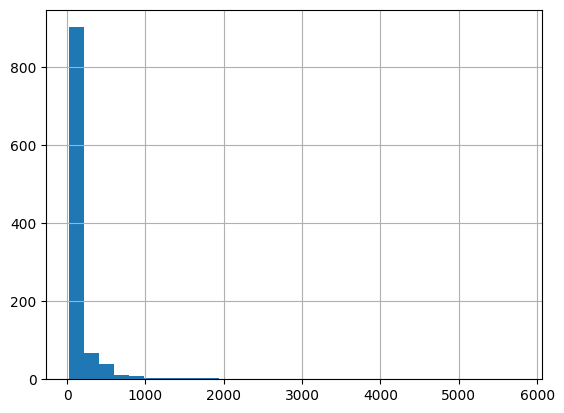

In [268]:
go_annotation_sums.hist(bins=30)

In [288]:
go_annotation_sums.sort_values(ascending=False).head(20)

GO:0005515    5775
GO:0016020    5391
GO:0005737    5142
GO:0005634    4798
GO:0016021    3745
GO:0005886    3596
GO:0046872    2597
GO:0005829    2441
GO:0006355    1860
GO:0007165    1826
GO:0006351    1757
GO:0000166    1712
GO:0003677    1636
GO:0006810    1544
GO:0005576    1533
GO:0005730    1500
GO:0044281    1375
GO:0016787    1335
GO:0005739    1313
GO:0005524    1280
dtype: int64

1) GO:0005515 protein binding
2) GO:0016020 membrane
3) GO:0005737 cytoplasm
4) GO:0005634 nucleus
5) GO:0016021 is replaced by GO:0016020 membrane see https://amigo.geneontology.org/amigo/term/GO:0016021
6) GO:0005886 plasma membrane
7) GO:0005829 cytosol
8) GO:0005576 extracellular region
9) GO:0005730 nucleolus
10) GO:0005739 mitochondrion
11) GO:0005887 replaced by GO:0005886 plasma membrane
12) GO:0005783 endoplasmic reticulum
13) GO:0005654 nucleoplasm

In [276]:
# logical OR of column GO:0016020 and GO:0016021, result into GO:0016020
meta_df['GO:0016020'] = meta_df['GO:0016020'] | meta_df['GO:0016021']

In [277]:
# drop column GO:0016021
meta_df = meta_df.drop(columns=['GO:0016021'])

In [278]:
meta_df['GO:0005886'] = meta_df['GO:0005886'] | meta_df['GO:0005887']

In [279]:
meta_df = meta_df.drop(columns=['GO:0005887'])

In [289]:
meta_df.sum(axis=0).sort_values(ascending=False).head(15)

GO:0005515    5775
GO:0016020    5422
GO:0005737    5142
GO:0005634    4798
GO:0005886    3781
GO:0046872    2597
GO:0005829    2441
GO:0006355    1860
GO:0007165    1826
GO:0006351    1757
GO:0000166    1712
GO:0003677    1636
GO:0006810    1544
GO:0005576    1533
GO:0005730    1500
dtype: int64

In [290]:
meta_df.sum(axis=0).sort_values(ascending=True).tail(1)

GO:0005515    5775
dtype: int64

In [291]:
top_GO_col_names = meta_df.sum(axis=0).sort_values(ascending=False).head(1).index

In [292]:
meta_df.sum(axis=0).sort_values(ascending=False)

GO:0005515    5775
GO:0016020    5422
GO:0005737    5142
GO:0005634    4798
GO:0005886    3781
              ... 
GO:0016922      20
GO:0030506      20
GO:0031593      20
GO:0042056      20
GO:0008601      20
Length: 1050, dtype: int64

In [293]:
top_GO_col_names

Index(['GO:0005515'], dtype='object')

In [294]:
protein_go_counts = meta_df.sum(axis=1)

In [295]:
protein_go_counts

GO_Annatiation
Q8TBF5     5
Q8TBF4    11
Q5MIZ7     6
P30613    23
Q5H9L4    11
          ..
Q8WXA9     9
Q8WXA8     7
Q6ZSZ5    16
Q8WXA3     3
Q7Z739     1
Length: 13690, dtype: int64

### How many GO annotations does each protein have?

Most have 0 - 20. Again very right skewed

<Axes: >

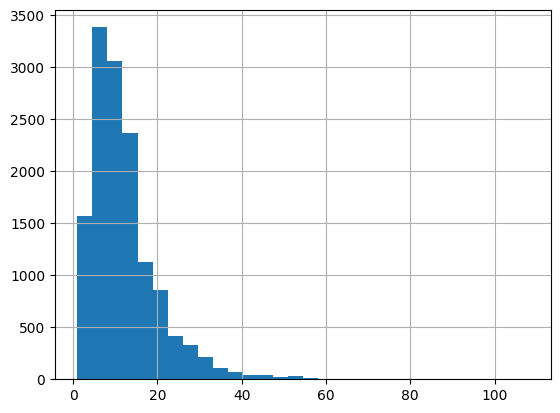

In [217]:
protein_go_counts.hist(bins=30)

In [218]:
protein_go_counts.describe()

count    13690.000000
mean        12.200950
std          8.389333
min          1.000000
25%          7.000000
50%         10.000000
75%         15.000000
max        108.000000
dtype: float64

most between 1 and 20

### Distribution number of top GO term that proteins have

<Axes: >

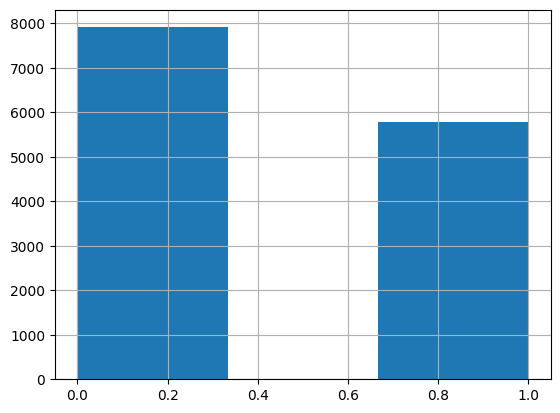

In [298]:
meta_df[top_GO_col_names].sum(axis=1).hist(bins=3)

In [299]:
# percent of proteins with the top GO annotation
meta_df[top_GO_col_names].sum(axis=1).mean()

0.4218407596785975

### 42 percent of proteins have the protein binding GO annotation

In [300]:
sequence_length = df['Sequence'].apply(len)

In [301]:
sequence_length

0        258
1        217
2        849
3        198
4        462
        ... 
12982    508
12983    447
12984    286
12985    606
12986    585
Name: Sequence, Length: 12987, dtype: int64

### Distribution of amino acid sequence length

<Axes: >

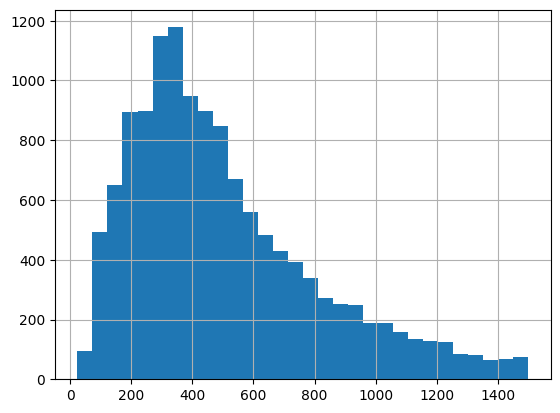

In [302]:
sequence_length.hist(bins=30)

Log normal distribution. most are around 100 - 600 long

# Data Prep

In [303]:
df = pd.merge(df, meta_df[top_GO_col_names], left_on='Protein', right_index=True, how='left')

In [304]:
df

,Protein,Sequence,GO:0005515
0,Q8TBF5,MAARVAAVRAAAWLLLGAATGLTRGPAAAFTAARSDAGIRAMCSEI...,0.0
1,Q8TBF4,MSGGLAPSKSTVYVSNLPFSLTNNDLYRIFSKYGKVVKVTIMKDKD...,0.0
2,Q5MIZ7,MSDTRRRVKVYTLNEDRQWDDRGTGHVSSTYVEELKGMSLLVRAES...,0.0
3,Q8TBF2,MSTVDLARVGACILKHAVTGEAVELRSLWREHACVVAGLRRFGCVV...,0.0
4,Q5H9L4,MECPEGQLPISSENDSTPTVSTSEVTSQQEPQILVDRGSETTYESS...,0.0
...,...,...,...
12982,Q8WXA9,MTSLMPGAGLLPIPTPNPLTTLGVSLSSLGAIPAAALDPNIATLGE...,0.0
12983,Q8WXA8,MEGGWPARQSALLCLTVSLLLQGRGDAFTINCSGFDQHGVDPAVFQ...,0.0
12984,O75323,MAARVLRARGAAWAGGLLQRAAPCSLLPRLRTWTSSSNRSREDSWL...,1.0
12985,Q8WXA3,MATKDPTAVERANLLNMAKLSIKGLIESALSFGRTLDSDYPPLQQF...,0.0


In [305]:
# fill NaN values with 0
df = df.fillna(0)

In [306]:
# filter sequences with length > 600
df = df[df['Sequence'].apply(len) <= 800]

In [307]:
sequence_length = df['Sequence'].apply(len)

<Axes: >

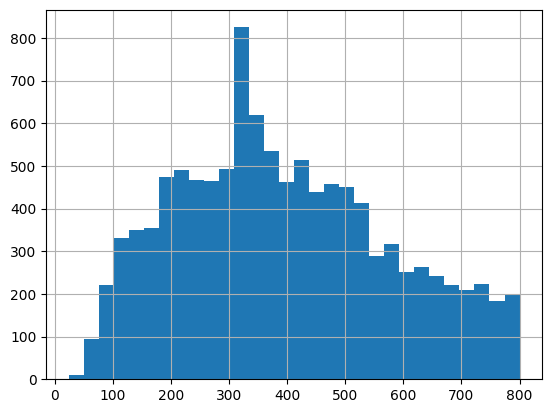

In [308]:
sequence_length.hist(bins=30)

In [309]:
df[top_GO_col_names] = df[top_GO_col_names].astype(int)

In [310]:
df

,Protein,Sequence,GO:0005515
0,Q8TBF5,MAARVAAVRAAAWLLLGAATGLTRGPAAAFTAARSDAGIRAMCSEI...,0
1,Q8TBF4,MSGGLAPSKSTVYVSNLPFSLTNNDLYRIFSKYGKVVKVTIMKDKD...,0
3,Q8TBF2,MSTVDLARVGACILKHAVTGEAVELRSLWREHACVVAGLRRFGCVV...,0
4,Q5H9L4,MECPEGQLPISSENDSTPTVSTSEVTSQQEPQILVDRGSETTYESS...,0
5,Q9NQ76,MRVFCVGLLLFSVTWAAPTFQPQTEKTKQSCVEEQRQEEKNKDNIG...,1
...,...,...,...
12982,Q8WXA9,MTSLMPGAGLLPIPTPNPLTTLGVSLSSLGAIPAAALDPNIATLGE...,0
12983,Q8WXA8,MEGGWPARQSALLCLTVSLLLQGRGDAFTINCSGFDQHGVDPAVFQ...,0
12984,O75323,MAARVLRARGAAWAGGLLQRAAPCSLLPRLRTWTSSSNRSREDSWL...,1
12985,Q8WXA3,MATKDPTAVERANLLNMAKLSIKGLIESALSFGRTLDSDYPPLQQF...,0


Each letter is an amino acid. there are 22 amino acids, Can one hot encode them.

In [311]:
# Get all unique sequences characters from df['Sequence']
unique_chars = set(''.join(df['Sequence']))

In [312]:
unique_chars

{'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y'}

In [313]:
# Create a dictionary to map unique characters to integers
char_to_int = {char: i for i, char in enumerate(unique_chars)}

In [314]:
char_to_int

{'M': 0,
 'P': 1,
 'V': 2,
 'U': 3,
 'C': 4,
 'R': 5,
 'T': 6,
 'Y': 7,
 'X': 8,
 'L': 9,
 'F': 10,
 'S': 11,
 'I': 12,
 'G': 13,
 'N': 14,
 'D': 15,
 'W': 16,
 'H': 17,
 'A': 18,
 'Q': 19,
 'K': 20,
 'E': 21}

In [315]:
# function to one-hot encode a sequence
def one_hot_encode_sequence(sequence, char_to_int, seq_length):
    """
    One-hot encode a sequence using a character-to-integer mapping and a fixed sequence length
    """
    # Create an array of zeros with the required sequence length and number of possible characters
    encoding = np.zeros((seq_length, len(char_to_int)), dtype=np.int8)
    # Iterate over the characters in the input sequence
    for i, char in enumerate(sequence):
        # Get the integer encoding of the character
        char_index = char_to_int[char]
        # Set the appropriate element of the array to 1
        encoding[i, char_index] = 1
    return encoding

In [316]:
one_hot_encode_sequence('A', char_to_int, sequence_length.max())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [317]:
df['Sequence']

0        MAARVAAVRAAAWLLLGAATGLTRGPAAAFTAARSDAGIRAMCSEI...
1        MSGGLAPSKSTVYVSNLPFSLTNNDLYRIFSKYGKVVKVTIMKDKD...
3        MSTVDLARVGACILKHAVTGEAVELRSLWREHACVVAGLRRFGCVV...
4        MECPEGQLPISSENDSTPTVSTSEVTSQQEPQILVDRGSETTYESS...
5        MRVFCVGLLLFSVTWAAPTFQPQTEKTKQSCVEEQRQEEKNKDNIG...
                               ...                        
12982    MTSLMPGAGLLPIPTPNPLTTLGVSLSSLGAIPAAALDPNIATLGE...
12983    MEGGWPARQSALLCLTVSLLLQGRGDAFTINCSGFDQHGVDPAVFQ...
12984    MAARVLRARGAAWAGGLLQRAAPCSLLPRLRTWTSSSNRSREDSWL...
12985    MATKDPTAVERANLLNMAKLSIKGLIESALSFGRTLDSDYPPLQQF...
12986    MSATSVDQRPKGQGNKVSVQNGSIHQKDAVNDDDFEPYLSSQTNQS...
Name: Sequence, Length: 10866, dtype: object

In [318]:
# one hot encode all sequences
seq_length = sequence_length.max()
df['one-hot-sequence'] = df['Sequence'].apply(one_hot_encode_sequence, args=(char_to_int, seq_length))

In [320]:
# Legacy function that we used to make integer encoding of the sequences, rather than one-hot encoding

def encode_sequence(sequence, max_len):
    """
    Encode a sequence of characters as a list of integers
    """
    encoded = [char_to_int[char] for char in sequence]

    # pad to the right with 0s
    if len(encoded) < max_len:
        encoded += [0] * (max_len - len(encoded))

    return encoded

In [321]:
# df['encoded-sequence-not-one-hot'] = df['Sequence'].apply(encode_sequence, args=(seq_length,))
# df['encoded-sequence-not-one-hot']

In [322]:
train_data, test_data = train_test_split(df, test_size=0.05, random_state=42)

In [323]:
train_data

,Protein,Sequence,GO:0005515,one-hot-sequence
12375,P02533,MTTCSRQFTSSSSMKGSCGIGGGIGGGSSRISSVLAGGSCRAPSTY...,1,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1704,Q15006,MAKVSELYDVTWEEMRDKMRKWREENSRNSEQIVEVGEELINEYAS...,0,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
8441,Q9BTX1,MATAVSRPCAGRSRDILWRVLGWRIVASIVWSVLFLPICTTVFIIF...,0,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9340,Q8NGE0,MLRNGSIVTEFILVGFQQSSTSTRALLFALFLALYSLTMAMNGLII...,0,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
160,Q96HA8,MEGNGPAAVHYQPASPPRDACVYSSCYCEENIWKLCEYIKNHDQYP...,1,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...
6825,P09038,MVGVGGGDVEDVTPRPGGCQISGRGARGCNGIPGAAAWEAALPRRR...,1,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6184,Q9NPD3,MAGLELLSDQGYRVDGRRAGELRKIQARMGVFAQADGSAYIEQGNT...,1,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6412,P49207,MVQRLTYRRRLSYNTASNKTRLSRTPGNRIVYLYTKKVGKAPKSAC...,0,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1015,Q70IA6,MDWLMGKSKAKPNGKKPAAEERKAYLEPEHTKARITDFQFKELVVL...,0,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Train

In [324]:
vocab_size = len(char_to_int)
input_length = sequence_length.max()

In [325]:
# input length is the length of the longest sequence
input_length

800

In [326]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=60, activation='relu', input_shape=(input_length, vocab_size)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
# Adjust the final layer and activation according to your specific problem
model.add(Dense(len(top_GO_col_names), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [327]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 741, 64)           84544     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 370, 64)           0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 23680)             0         
                                                                 
 dense_12 (Dense)            (None, 50)                1184050   
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1268645 (4.84 MB)
Trainable params: 1268645 (4.84 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [250]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [88]:
# Train the model # 60 kernel 400 length
history = model.fit(np.stack(train_data['one-hot-sequence']), train_data[top_GO_col_names], epochs=12, batch_size=32, callbacks=[tensorboard_callback])

Epoch 1/12


2024-03-26 09:11:50.864028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


179/179 [==============================] - 4s 19ms/step - loss: 0.5635 - accuracy: 0.4379
Epoch 2/12
179/179 [==============================] - 3s 16ms/step - loss: 0.4819 - accuracy: 0.4982
Epoch 3/12
179/179 [==============================] - 3s 16ms/step - loss: 0.3894 - accuracy: 0.5755
Epoch 4/12
179/179 [==============================] - 3s 16ms/step - loss: 0.2703 - accuracy: 0.6279
Epoch 5/12
179/179 [==============================] - 3s 16ms/step - loss: 0.1709 - accuracy: 0.6597
Epoch 6/12
179/179 [==============================] - 3s 16ms/step - loss: 0.1082 - accuracy: 0.6706
Epoch 7/12
179/179 [==============================] - 3s 17ms/step - loss: 0.0643 - accuracy: 0.6739
Epoch 8/12
179/179 [==============================] - 3s 16ms/step - loss: 0.0352 - accuracy: 0.6687
Epoch 9/12
179/179 [==============================] - 3s 16ms/step - loss: 0.0200 - accuracy: 0.6595
Epoch 10/12
179/179 [==============================] - 3s 15ms/step - loss: 0.0129 - accuracy: 0.6597


In [92]:
# Train the model # 400 len, 100 kernel size 100 filters
history = model.fit(np.stack(train_data['one-hot-sequence']), train_data[top_GO_col_names], epochs=12, batch_size=32, callbacks=[tensorboard_callback])

Epoch 1/12
179/179 [==============================] - 4s 23ms/step - loss: 0.0021 - accuracy: 0.6254
Epoch 2/12
179/179 [==============================] - 4s 24ms/step - loss: 0.0019 - accuracy: 0.6212
Epoch 3/12
179/179 [==============================] - 4s 24ms/step - loss: 0.0015 - accuracy: 0.6324
Epoch 4/12
179/179 [==============================] - 4s 22ms/step - loss: 0.0015 - accuracy: 0.6151
Epoch 5/12
179/179 [==============================] - 4s 22ms/step - loss: 5.6373e-04 - accuracy: 0.6368
Epoch 6/12
179/179 [==============================] - 4s 22ms/step - loss: 4.1690e-04 - accuracy: 0.6280
Epoch 7/12
179/179 [==============================] - 4s 22ms/step - loss: 3.4672e-04 - accuracy: 0.6245
Epoch 8/12
179/179 [==============================] - 4s 22ms/step - loss: 2.9408e-04 - accuracy: 0.6251
Epoch 9/12
179/179 [==============================] - 4s 24ms/step - loss: 2.5182e-04 - accuracy: 0.6212
Epoch 10/12
179/179 [==============================] - 4s 23ms/step - l

In [112]:
# Train the model # 300 len, 60 kernel size 64 filters
history = model.fit(np.stack(train_data['one-hot-sequence']), train_data[top_GO_col_names], epochs=18, batch_size=32, callbacks=[tensorboard_callback])

Epoch 1/18
107/107 [==============================] - 2s 14ms/step - loss: 0.0153 - accuracy: 0.5954
Epoch 2/18
107/107 [==============================] - 2s 14ms/step - loss: 0.0110 - accuracy: 0.6019
Epoch 3/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0094 - accuracy: 0.6063
Epoch 4/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0071 - accuracy: 0.5892
Epoch 5/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0065 - accuracy: 0.5942
Epoch 6/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0062 - accuracy: 0.5857
Epoch 7/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0052 - accuracy: 0.5957
Epoch 8/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0037 - accuracy: 0.5939
Epoch 9/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0027 - accuracy: 0.5957
Epoch 10/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0028 - accura

Simplifying the problem and trying to make the model larger and still not getting better performance. What this tells us is that there could be an issue with the data. Will look into eliminating possible repeats within the Excel files

In [156]:
# Train the model # 300 len, 60 kernel size 64 filters, predicting 1 GO term
history = model.fit(np.stack(train_data['one-hot-sequence']), train_data[top_GO_col_names], epochs=18, batch_size=32, callbacks=[tensorboard_callback])

Epoch 1/18
107/107 [==============================] - 3s 18ms/step - loss: 0.6718 - accuracy: 0.6181
Epoch 2/18
107/107 [==============================] - 2s 15ms/step - loss: 0.5991 - accuracy: 0.6613
Epoch 3/18
107/107 [==============================] - 2s 14ms/step - loss: 0.3466 - accuracy: 0.8659
Epoch 4/18
107/107 [==============================] - 1s 14ms/step - loss: 0.0791 - accuracy: 0.9838
Epoch 5/18
107/107 [==============================] - 2s 14ms/step - loss: 0.0459 - accuracy: 0.9950
Epoch 6/18
107/107 [==============================] - 2s 14ms/step - loss: 0.0247 - accuracy: 0.9968
Epoch 7/18
107/107 [==============================] - 2s 15ms/step - loss: 0.0094 - accuracy: 0.9985
Epoch 8/18
107/107 [==============================] - 2s 14ms/step - loss: 0.0096 - accuracy: 0.9988
Epoch 9/18
107/107 [==============================] - 1s 14ms/step - loss: 0.0048 - accuracy: 0.9991
Epoch 10/18
107/107 [==============================] - 2s 14ms/step - loss: 0.0199 - accura

In [189]:
# Train the model # 600 len, 60 kernel size 64 filters, predicting 1 GO term
history = model.fit(np.stack(train_data['one-hot-sequence']), train_data[top_GO_col_names], epochs=18, batch_size=32, callbacks=[tensorboard_callback])

Epoch 1/18
272/272 [==============================] - 6s 19ms/step - loss: 0.7339 - accuracy: 0.5804
Epoch 2/18
272/272 [==============================] - 5s 18ms/step - loss: 0.6690 - accuracy: 0.6263
Epoch 3/18
272/272 [==============================] - 5s 18ms/step - loss: 0.7008 - accuracy: 0.6270
Epoch 4/18
272/272 [==============================] - 5s 18ms/step - loss: 0.6192 - accuracy: 0.6588
Epoch 5/18
272/272 [==============================] - 5s 19ms/step - loss: 0.7483 - accuracy: 0.6107
Epoch 6/18
272/272 [==============================] - 5s 18ms/step - loss: 0.5923 - accuracy: 0.6791
Epoch 7/18
272/272 [==============================] - 5s 18ms/step - loss: 0.5650 - accuracy: 0.7017
Epoch 8/18
272/272 [==============================] - 5s 18ms/step - loss: 0.5059 - accuracy: 0.7512
Epoch 9/18
272/272 [==============================] - 5s 18ms/step - loss: 0.4311 - accuracy: 0.8107
Epoch 10/18
272/272 [==============================] - 5s 19ms/step - loss: 0.3511 - accura

In [251]:
# Train the model # 800 len, 60 kernel size 64 filters, predicting 1 GO term
history = model.fit(np.stack(train_data['one-hot-sequence']), train_data[top_GO_col_names], epochs=18, batch_size=32, callbacks=[tensorboard_callback])

Epoch 1/18
323/323 [==============================] - 7s 21ms/step - loss: 0.6498 - accuracy: 0.6089
Epoch 2/18
323/323 [==============================] - 7s 20ms/step - loss: 0.5932 - accuracy: 0.6676
Epoch 3/18
323/323 [==============================] - 7s 21ms/step - loss: 0.4049 - accuracy: 0.8166
Epoch 4/18
323/323 [==============================] - 7s 21ms/step - loss: 0.0969 - accuracy: 0.9704
Epoch 5/18
323/323 [==============================] - 7s 21ms/step - loss: 0.0410 - accuracy: 0.9926
Epoch 6/18
323/323 [==============================] - 7s 21ms/step - loss: 0.0118 - accuracy: 0.9986
Epoch 7/18
323/323 [==============================] - 7s 21ms/step - loss: 0.0086 - accuracy: 0.9988
Epoch 8/18
323/323 [==============================] - 7s 21ms/step - loss: 0.0058 - accuracy: 0.9996
Epoch 9/18
323/323 [==============================] - 7s 21ms/step - loss: 6.2554e-04 - accuracy: 1.0000
Epoch 10/18
323/323 [==============================] - 7s 20ms/step - loss: 6.3201e-04 

Did not really see an improvement by adding another convolution layer. This is likely because the conv layer cannot capture global relationships that the animo acid sequences have

# Evaluate

In [190]:
# import metrics
from tensorflow.keras.metrics import Precision, Recall

In [252]:
# test the model
results = model.evaluate(np.stack(test_data['one-hot-sequence']), test_data[top_GO_col_names], verbose=1)

17/17 [==============================] - 0s 11ms/step - loss: 2.2992 - accuracy: 0.5993


In [253]:
print(f'Test loss: {results[0]}, Test accuracy: {results[1]}')

Test loss: 2.2991693019866943, Test accuracy: 0.5992646813392639


In [254]:
preds = model.predict(np.stack(test_data['one-hot-sequence']))
gt = test_data[top_GO_col_names]

17/17 [==============================] - 0s 12ms/step


In [255]:
# calculate precision, recall, and F1 score
precision = Precision()
precision.update_state(gt, preds)
precision_result = precision.result().numpy()

In [256]:
precision_result

0.52910054

In [257]:
recall = Recall()
recall.update_state(gt, preds)
recall_result = recall.result().numpy()

In [258]:
recall_result

0.43668124

In [58]:
# function to predict GO terms for a given sequence
def predict_GO_terms(sequence, model, char_to_int, seq_length):
    """
    Predict GO terms for a given sequence using a trained model
    """
    # One-hot encode the sequence
    one_hot_sequence = one_hot_encode_sequence(sequence, char_to_int, seq_length)
    # Add an extra dimension to the sequence to match the input shape of the model
    one_hot_sequence = np.expand_dims(one_hot_sequence, axis=0)
    # Use the model to predict the GO terms
    predictions = model.predict(one_hot_sequence)
    return predictions

In [199]:
ret = predict_GO_terms('A', model, char_to_int, sequence_length.max())

NameError: name 'predict_GO_terms' is not defined

In [200]:
ret

NameError: name 'ret' is not defined

Each one of the 10 floats is the probability that the sequence has the cooresponding GO annotation.

In [61]:
ret.shape

(1, 10)

In [62]:
top_GO_col_names

Index(['GO:0005515', 'GO:0016020', 'GO:0005737', 'GO:0005634', 'GO:0005886',
       'GO:0046872', 'GO:0005829', 'GO:0006355', 'GO:0007165', 'GO:0006351'],
      dtype='object')